In [42]:
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import concatenate
from keras.models import Model

from utils_ds import plot_keras_model, print_weights_shape

from keras.applications import InceptionV3

In [46]:
model = InceptionV3(input_shape=(150, 150, 3))

In [47]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_107 (Conv2D)             (None, 74, 74, 32)   864         input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_107[0][0]                 
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_108

In [43]:
print_weights_shape(model)

-------------
-------------
(3, 3, 3, 32)
-------------
(32,)
(32,)
(32,)
-------------
-------------
(3, 3, 32, 32)
-------------
(32,)
(32,)
(32,)
-------------
-------------
(3, 3, 32, 64)
-------------
(64,)
(64,)
(64,)
-------------
-------------
-------------
(1, 1, 64, 80)
-------------
(80,)
(80,)
(80,)
-------------
-------------
(3, 3, 80, 192)
-------------
(192,)
(192,)
(192,)
-------------
-------------
-------------
(1, 1, 192, 64)
-------------
(64,)
(64,)
(64,)
-------------
-------------
(1, 1, 192, 48)
-------------
(3, 3, 64, 96)
-------------
(48,)
(48,)
(48,)
-------------
(96,)
(96,)
(96,)
-------------
-------------
-------------
-------------
(1, 1, 192, 64)
-------------
(5, 5, 48, 64)
-------------
(3, 3, 96, 96)
-------------
(1, 1, 192, 32)
-------------
(64,)
(64,)
(64,)
-------------
(64,)
(64,)
(64,)
-------------
(96,)
(96,)
(96,)
-------------
(32,)
(32,)
(32,)
-------------
-------------
-------------
-------------
-------------
-------------
(1, 1, 25

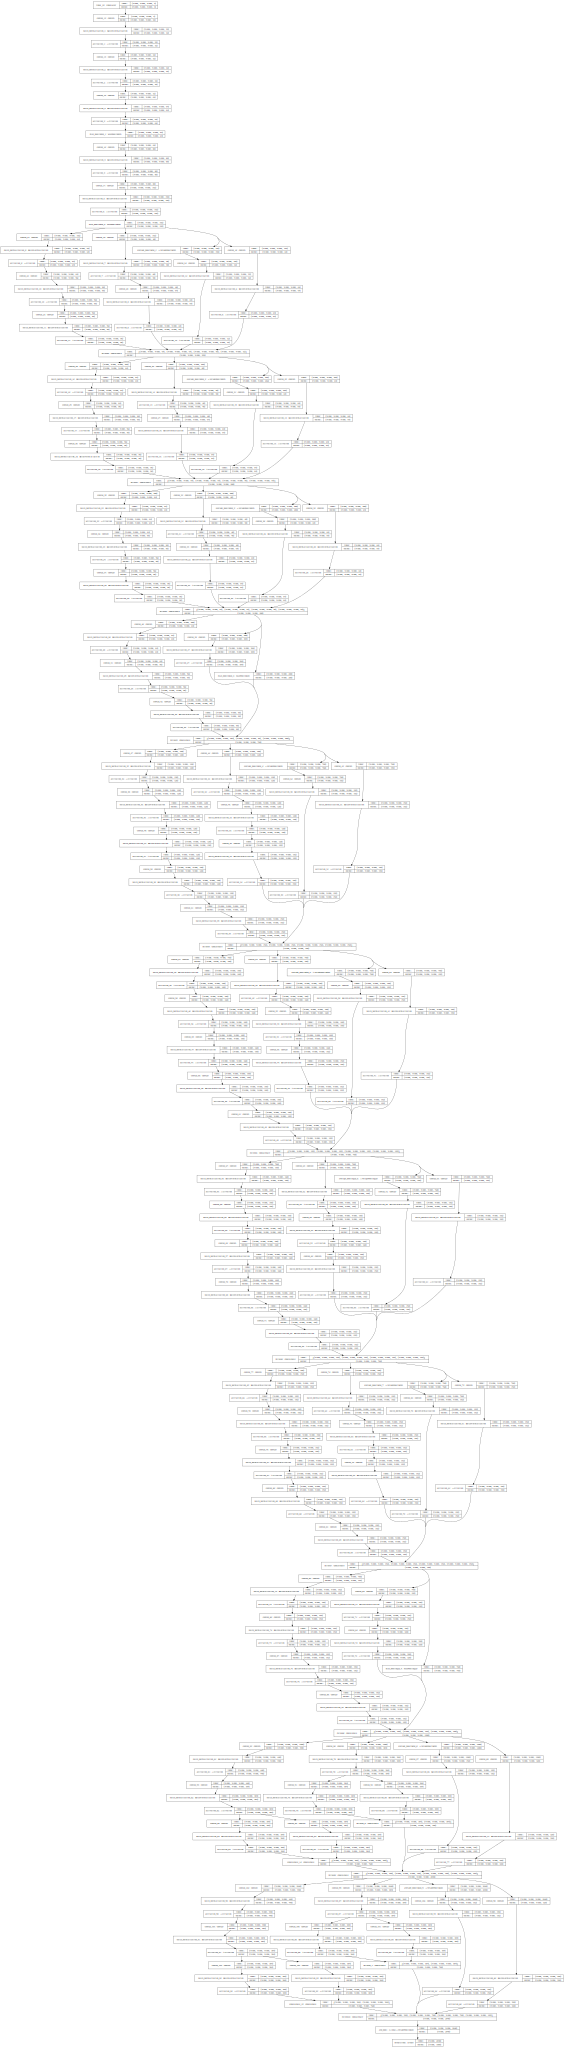

In [41]:
plot_keras_model(model)

In [58]:
# book 
inputs = layers.Input(shape=(150, 150, 3))
x = inputs
branch_a = Conv2D(128, 1, activation='relu', padding='same', strides=2, name='brach_a')(x)

branch_b = Conv2D(128, 1, activation='relu', padding='same', name='brach_b1')(x)
branch_b = Conv2D(128, 1, activation='relu', padding='same', strides=2, name='brach_b2')(branch_b)

branch_c = AveragePooling2D(3, padding='same', strides=2, name='brach_c1')(x)
branch_c = Conv2D(128, 3, padding='same', activation='relu', name='brach_c2')(branch_c)

branch_d = Conv2D(128, 1, activation='relu', padding='same', name='brach_d1')(x) 
branch_d = Conv2D(128, 3, activation='relu', padding='same', name='brach_d2')(branch_d) 
branch_d = Conv2D(128, 3, activation='relu', padding='same', strides=2, name='brach_d3')(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

model = Model(inputs, output)

In [59]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
brach_d1 (Conv2D)               (None, 150, 150, 128 512         input_34[0][0]                   
__________________________________________________________________________________________________
brach_b1 (Conv2D)               (None, 150, 150, 128 512         input_34[0][0]                   
__________________________________________________________________________________________________
brach_c1 (AveragePooling2D)     (None, 75, 75, 3)    0           input_34[0][0]                   
__________________________________________________________________________________________________
brach_d2 (

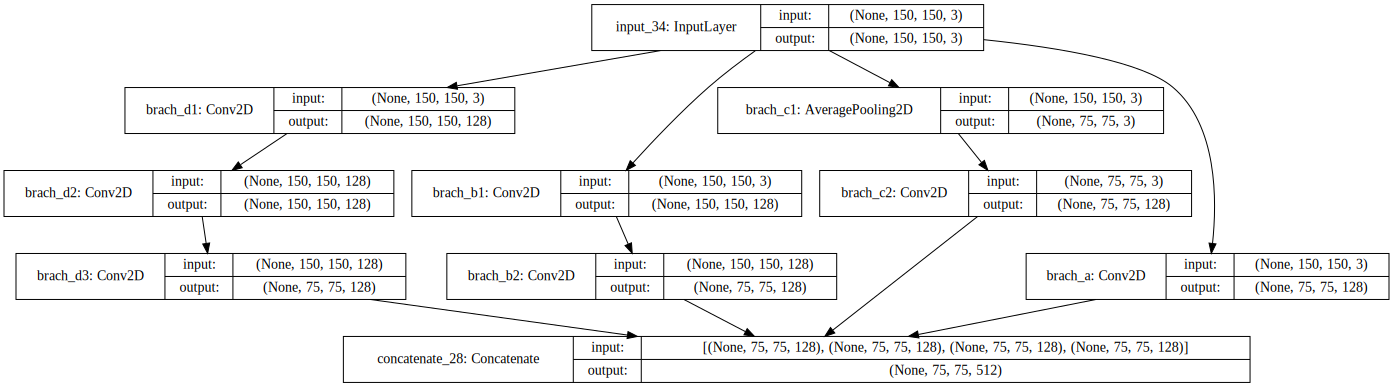

In [61]:
plot_keras_model(model, show_layer_names=True)